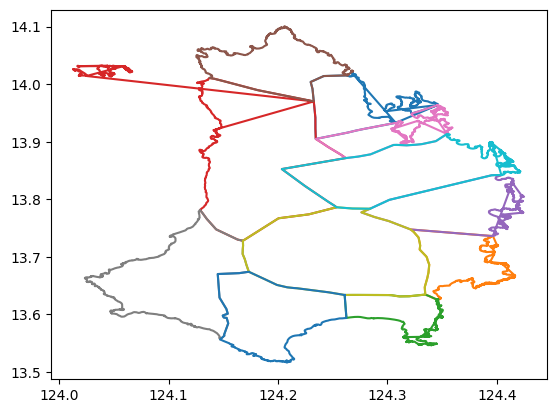

In [3]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

sf = shp.Reader("catanduanes_shapefile.shp")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

In [7]:
import pandas as pd
import plotly.express as px
import geopandas as gpd
import pyproj

<Axes: >

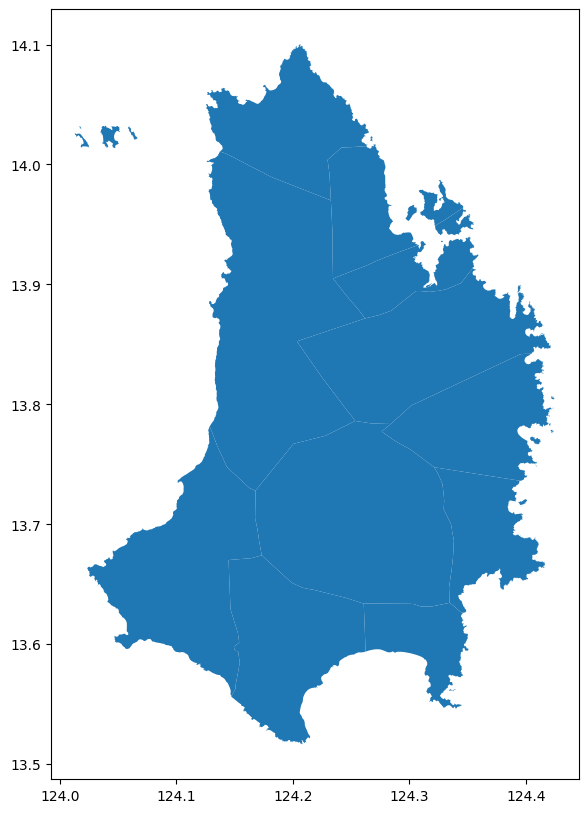

In [8]:
fname = 'catanduanes_shapefile.shp'
map_df = gpd.read_file(fname)
map_df.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)
df = pd.read_csv('CATANDUANES_case_information.csv')
map_df.plot(figsize=(20,10))

In [9]:
df.head()

,Unnamed: 0,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,19761,C781369,50.0,50 to 54,MALE,2020-05-30,NaN,2020-06-06,NaN,2020-07-07,...,CATANDUANES,SAN MIGUEL,PH052009000,NaN,NaN,RECOVERED,YES,NaN,NaN,Age or Birthdate is Invalid\r\nCase has Admitt...
1,29313,C636837,47.0,45 to 49,MALE,NaN,NaN,2020-06-22,NaN,2020-07-08,...,CATANDUANES,BAGAMANOC,PH052001000,NaN,NaN,RECOVERED,YES,NaN,NaN,Age or Birthdate is Invalid
2,43311,C951557,1.0,0 to 4,MALE,2020-07-02,2020-07-04,2020-07-06,NaN,2020-07-23,...,CATANDUANES,VIRAC (CAPITAL),PH052011000,NaN,NaN,RECOVERED,NO,2020-06-28,NaN,Age or Birthdate is Invalid
3,45859,C639154,21.0,20 to 24,MALE,2020-06-30,2020-07-05,2020-07-08,NaN,NaN,...,CATANDUANES,CARAMORAN,PH052004000,NaN,NaN,RECOVERED,NO,2020-06-30,NaN,"Removal Type is ""Recovered"", but no Recovered ..."
4,49871,C619176,22.0,20 to 24,FEMALE,2020-07-06,2020-07-07,2020-07-10,NaN,2020-07-23,...,CATANDUANES,VIRAC (CAPITAL),PH052011000,NaN,NaN,RECOVERED,YES,NaN,NO,Age or Birthdate is Invalid


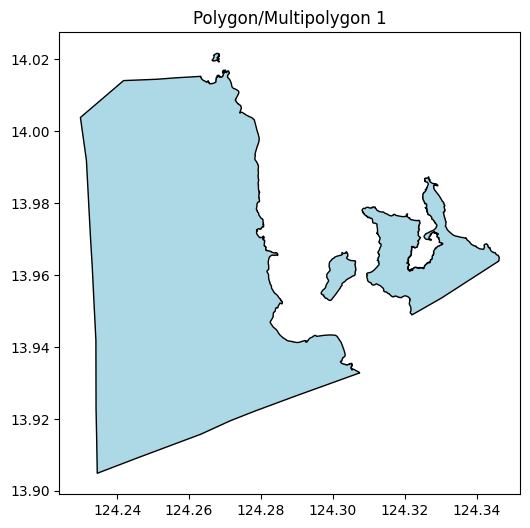

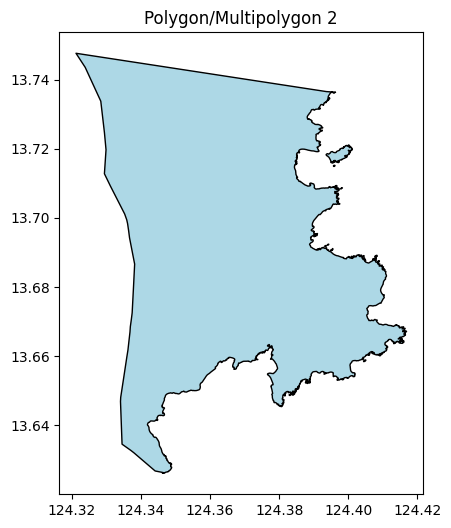

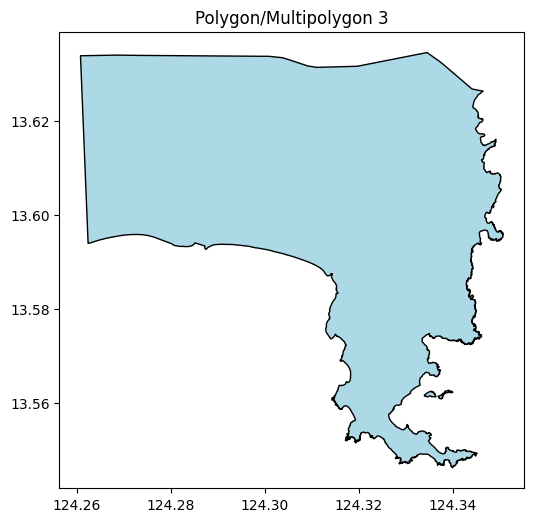

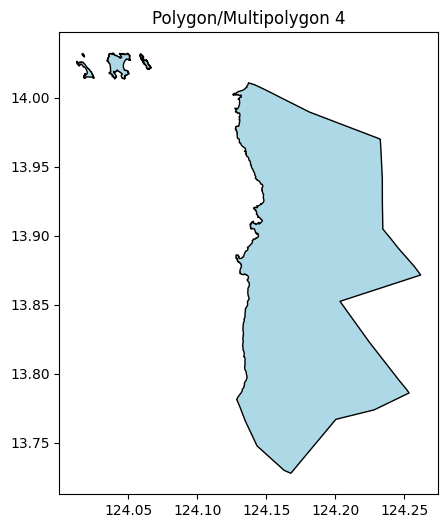

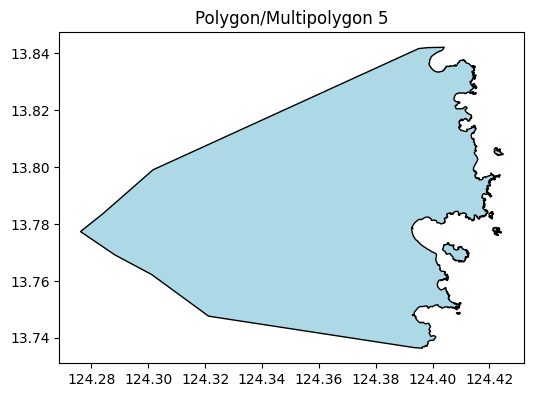

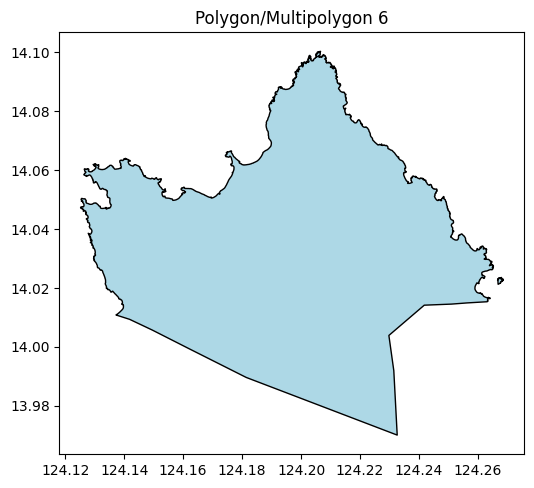

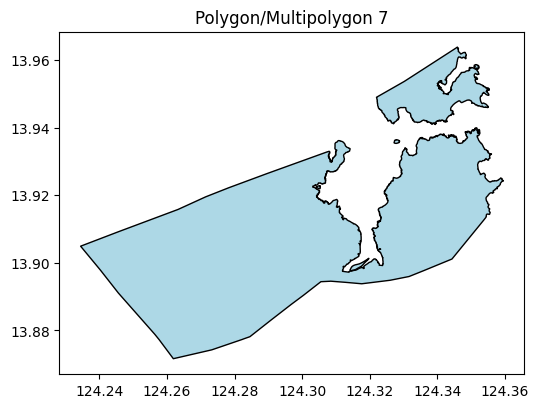

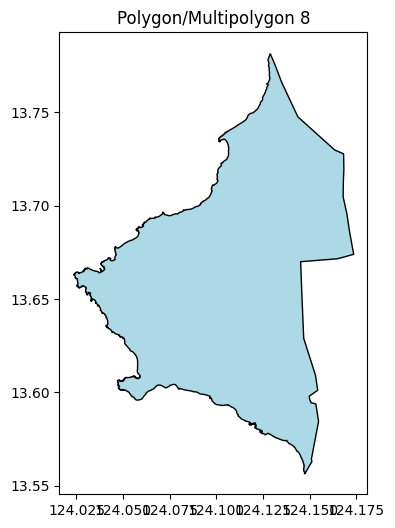

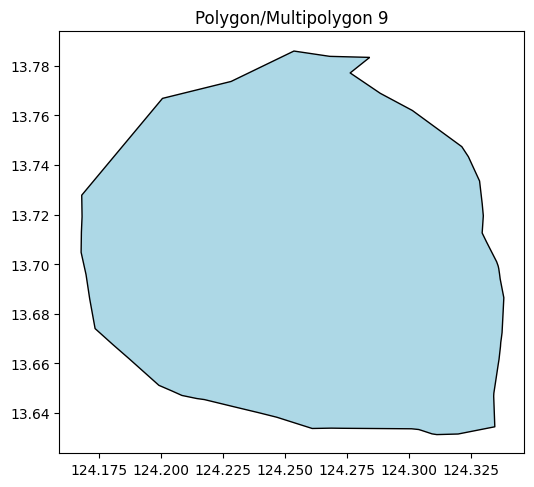

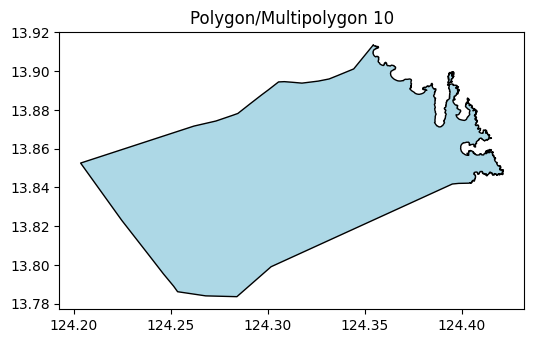

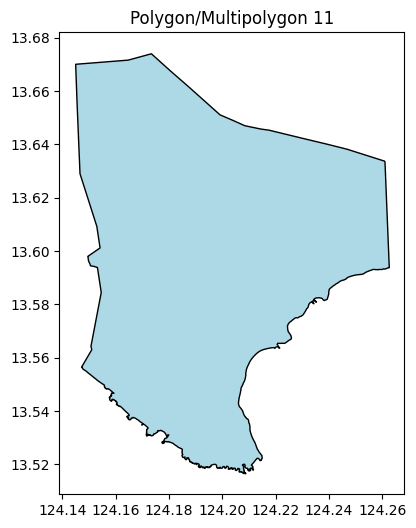

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_shapefile_individually(shapefile_path):
    # Read the shapefile
    gdf = gpd.read_file(shapefile_path)
    
    # Iterate through each polygon/multipolygon and plot individually
    for i, row in gdf.iterrows():
        fig, ax = plt.subplots(figsize=(6, 6))
        gpd.GeoSeries(row.geometry).plot(ax=ax, edgecolor='black', facecolor='lightblue')
        ax.set_title(f"Polygon/Multipolygon {i+1}")
        plt.show()

# Example usage
shapefile_path = "./catanduanes_shapefile.shp"
plot_shapefile_individually(shapefile_path)


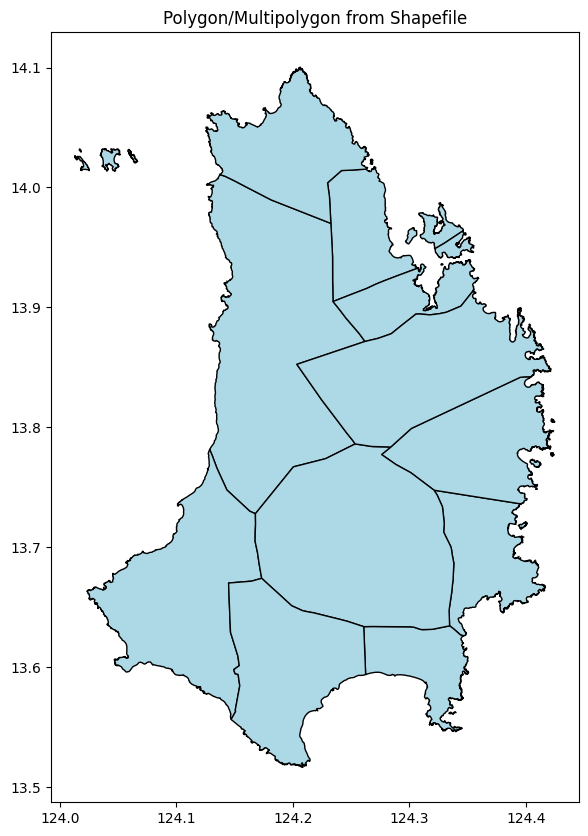

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_shapefile(shapefile_path):
    # Read the shapefile
    gdf = gpd.read_file(shapefile_path)
    
    # Plot the shapefile
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, edgecolor='black', facecolor='lightblue')
    
    # Set title and show plot
    ax.set_title("Polygon/Multipolygon from Shapefile")
    plt.show()

plot_shapefile(shapefile_path)

Polygon 1 is Bagamanoc
Polygon 2 is Baras
Polygon 3 is Bato
Polygon 4 is Caramoran
Polygon 5 is Gigmoto
Polygon 6 is Pandan
Polygon 7 is Panganiban
Polygon 8 is San Andres
Polygon 9 is San Miguel
Polygon 10 is Viga
Polygon 11 is Virac


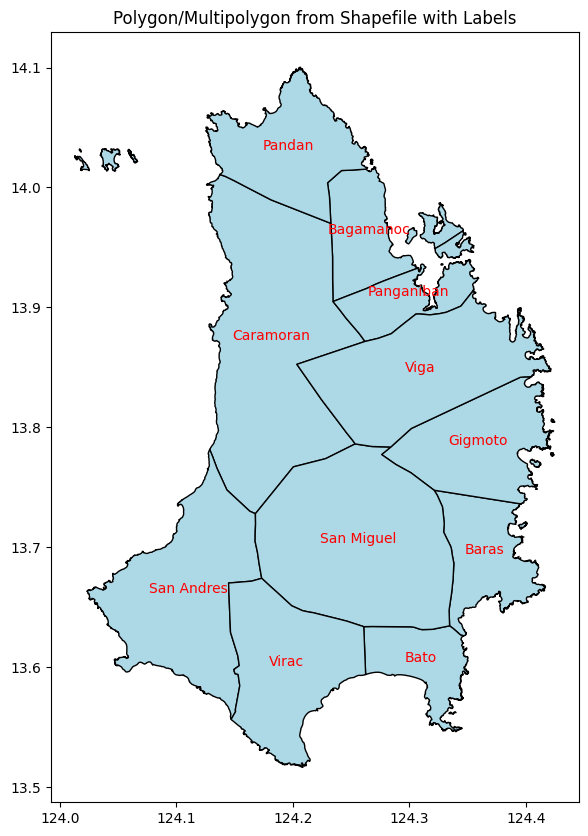

In [10]:
def update_shapefile_with_labels(shapefile_path, output_path):
    gdf = gpd.read_file(shapefile_path)
    
    labels = [
        "Bagamanoc", "Baras", "Bato", "Caramoran", "Gigmoto", "Pandan", 
        "Panganiban", "San Andres", "San Miguel", "Viga", "Virac"
    ]
    
    gdf["Labels"] = labels
    
    gdf.to_file(output_path)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, edgecolor='black', facecolor='lightblue')
    
    for i, (geometry, label) in enumerate(zip(gdf.geometry, labels)):
        centroid = geometry.centroid
        ax.text(centroid.x, centroid.y, label, fontsize=10, ha='center', color='red')
    
    ax.set_title("Polygon/Multipolygon from Shapefile with Labels")
    plt.show()

shapefile_path = "catanduanes_shapefile.shp"
output_shapefile_path = "./Data - Catanduanes/1_Processed/catanduanes_shapefile.shp"
update_shapefile_with_labels(shapefile_path, output_shapefile_path)